In [63]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh5/inc90/BHOSS_CODE"
data = "Rh5_Rl1_sig1_i90_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_360.dat"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=0)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9495.093347 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.500000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check self.obs_freqs!
N_obs_freqs is now overlaid to len(self.obs_freqs)
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 6.16597e-21 0.00225153
Total flux = 2.043743 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9894.325362 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.500000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check obs_freqs!
N_obs_freqs is now overlaid to len(obs_freqs)
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 1.98655e-15 0.00237993
Total flux = 1.937483 Jy at 230 GHz
133:55:30.181 - Start Program


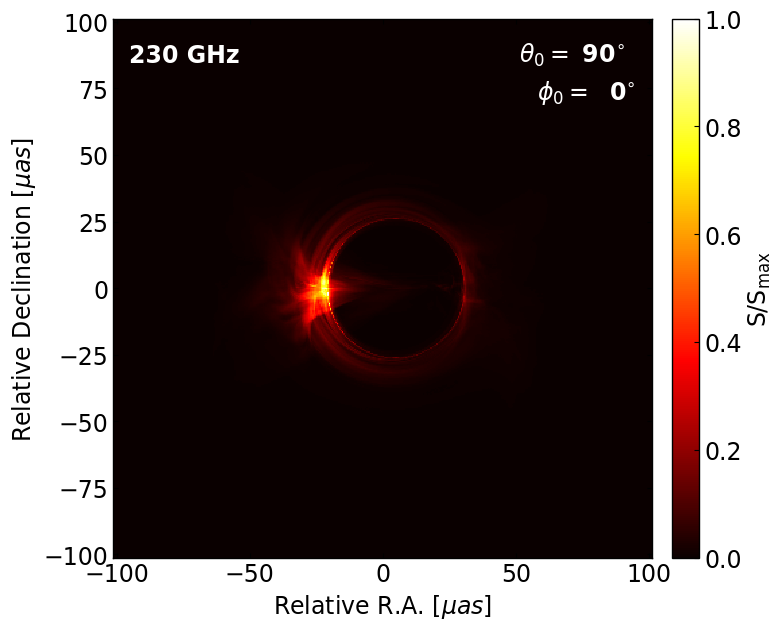

In [26]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [64]:
import os
import numpy as np

#find average flux
def bhoss_avg(Rhigh,Rlow,sig,inclination,phi0,model_name):

    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    else:
        print("no model")
        return
    
    if ((Rhigh==1) | (Rhigh==5) | (Rhigh==10)):
        Rh_str = "Rh%d"%Rhigh
    else:
        print("no model")
        return
    
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Rh_str,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    for image_ind in range(ind_start,ind_end+1):
        data_name="Rh%d_Rl%d_sig%d_i%d_ph%d_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_%s_%d.dat" \
        %(Rhigh,Rlow,sig,inclination,phi0,model_name,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+"Rh%d"%Rhigh,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

In [65]:
ind,time,z_tot,dscale = bhoss_avg(5, 1, 1, 10, 0, "MADS41A5")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh5/inc10/BHOSS_CODE
311, flux: 2.658094 at 9003.597816
312, flux: 2.672707 at 9013.664967
313, flux: 2.672465 at 9023.730951
314, flux: 2.600666 at 9033.794470
315, flux: 2.506855 at 9043.862656
316, flux: 2.467055 at 9053.929463
317, flux: 2.418067 at 9063.995875
318, flux: 2.350215 at 9074.060236
319, flux: 2.297789 at 9084.125014
320, flux: 2.308177 at 9094.191161
321, flux: 2.342135 at 9104.258463
322, flux: 2.370205 at 9114.324296
323, flux: 2.387248 at 9124.388087
324, flux: 2.381914 at 9134.450798
325, flux: 2.358260 at 9144.515488
326, flux: 2.346587 at 9154.580838
327, flux: 2.270592 at 9164.643343
328, flux: 2.199813 at 9174.708090
329, flux: 2.097175 at 9184.774596
330, flux: 2.031380 at 9194.841238
331, flux: 2.001002 at 9204.906551
332, flux: 1.992392 at 9214.968879
333, flux: 1.991325 at 9225.032659
334, flux: 1.979547 at 9235.096933
335, flux: 1.966909 at 9243.486122
336, flux: 1.906634 at 9253.551623
337, f

In [66]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh5/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [67]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh5/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 311/410/100
average z_tot = 2.004265 Jy, the density scale = 8.500000e-19


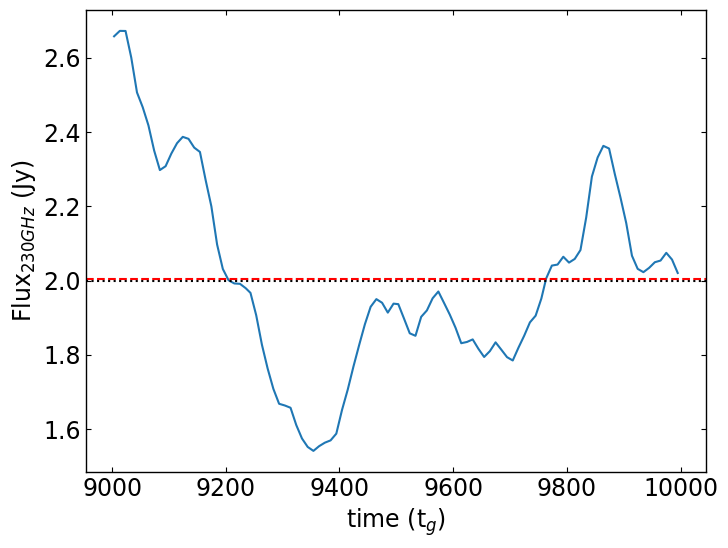

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [69]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

311:: 2.658094 Jy at 9003.597816
312:: 2.672707 Jy at 9013.664967
313:: 2.672465 Jy at 9023.730951
314:: 2.600666 Jy at 9033.794470
315:: 2.506855 Jy at 9043.862656
316:: 2.467055 Jy at 9053.929463
317:: 2.418067 Jy at 9063.995875
318:: 2.350215 Jy at 9074.060236
319:: 2.297789 Jy at 9084.125014
320:: 2.308177 Jy at 9094.191161
321:: 2.342135 Jy at 9104.258463
322:: 2.370205 Jy at 9114.324296
323:: 2.387248 Jy at 9124.388087
324:: 2.381914 Jy at 9134.450798
325:: 2.358260 Jy at 9144.515488
326:: 2.346587 Jy at 9154.580838
327:: 2.270592 Jy at 9164.643343
328:: 2.199813 Jy at 9174.708090
329:: 2.097175 Jy at 9184.774596
330:: 2.031380 Jy at 9194.841238
331:: 2.001002 Jy at 9204.906551
332:: 1.992392 Jy at 9214.968879
333:: 1.991325 Jy at 9225.032659
334:: 1.979547 Jy at 9235.096933
335:: 1.966909 Jy at 9243.486122
336:: 1.906634 Jy at 9253.551623
337:: 1.827253 Jy at 9263.615142
338:: 1.763103 Jy at 9273.678488
339:: 1.708372 Jy at 9283.741347
340:: 1.668210 Jy at 9293.805262
341:: 1.66

In [70]:
ind,time,z_tot,dscale = bhoss_avg(5, 1, 1, 30, 0, "MADS41A5")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh5/inc30/BHOSS_CODE
311, flux: 2.575283 at 9003.597816
312, flux: 2.574379 at 9013.664967
313, flux: 2.555857 at 9023.730951
314, flux: 2.475167 at 9033.794470
315, flux: 2.371659 at 9043.862656
316, flux: 2.318829 at 9053.929463
317, flux: 2.263726 at 9063.995875
318, flux: 2.206958 at 9074.060236
319, flux: 2.154717 at 9084.125014
320, flux: 2.166469 at 9094.191161
321, flux: 2.185741 at 9104.258463
322, flux: 2.203780 at 9114.324296
323, flux: 2.231243 at 9124.388087
324, flux: 2.238800 at 9134.450798
325, flux: 2.243287 at 9144.515488
326, flux: 2.265182 at 9154.580838
327, flux: 2.208403 at 9164.643343
328, flux: 2.155138 at 9174.708090
329, flux: 2.066567 at 9184.774596
330, flux: 2.012182 at 9194.841238
331, flux: 1.987930 at 9204.906551
332, flux: 2.001051 at 9214.968879
333, flux: 2.023208 at 9225.032659
334, flux: 2.022624 at 9235.096933
335, flux: 2.014634 at 9243.486122
336, flux: 1.945165 at 9253.551623
337, f

In [71]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh5/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [72]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh5/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 311/410/100
average z_tot = 2.004566 Jy, the density scale = 8.400000e-19


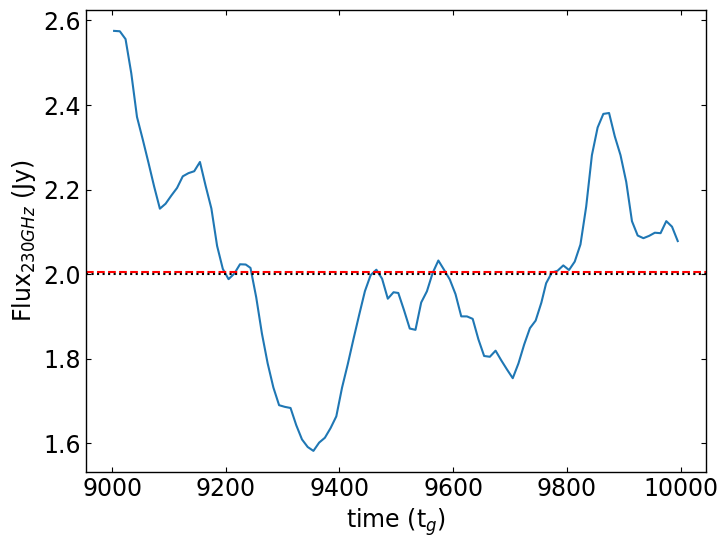

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [74]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

311:: 2.575283 Jy at 9003.597816
312:: 2.574379 Jy at 9013.664967
313:: 2.555857 Jy at 9023.730951
314:: 2.475167 Jy at 9033.794470
315:: 2.371659 Jy at 9043.862656
316:: 2.318829 Jy at 9053.929463
317:: 2.263726 Jy at 9063.995875
318:: 2.206958 Jy at 9074.060236
319:: 2.154717 Jy at 9084.125014
320:: 2.166469 Jy at 9094.191161
321:: 2.185741 Jy at 9104.258463
322:: 2.203780 Jy at 9114.324296
323:: 2.231243 Jy at 9124.388087
324:: 2.238800 Jy at 9134.450798
325:: 2.243287 Jy at 9144.515488
326:: 2.265182 Jy at 9154.580838
327:: 2.208403 Jy at 9164.643343
328:: 2.155138 Jy at 9174.708090
329:: 2.066567 Jy at 9184.774596
330:: 2.012182 Jy at 9194.841238
331:: 1.987930 Jy at 9204.906551
332:: 2.001051 Jy at 9214.968879
333:: 2.023208 Jy at 9225.032659
334:: 2.022624 Jy at 9235.096933
335:: 2.014634 Jy at 9243.486122
336:: 1.945165 Jy at 9253.551623
337:: 1.859278 Jy at 9263.615142
338:: 1.788864 Jy at 9273.678488
339:: 1.731755 Jy at 9283.741347
340:: 1.689855 Jy at 9293.805262
341:: 1.68

In [75]:
ind,time,z_tot,dscale = bhoss_avg(5, 1, 1, 50, 0, "MADS41A5")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh5/inc50/BHOSS_CODE
311, flux: 2.479796 at 9003.597816
312, flux: 2.479513 at 9013.664967
313, flux: 2.457255 at 9023.730951
314, flux: 2.369916 at 9033.794470
315, flux: 2.263598 at 9043.862656
316, flux: 2.211202 at 9053.929463
317, flux: 2.156414 at 9063.995875
318, flux: 2.117728 at 9074.060236
319, flux: 2.075261 at 9084.125014
320, flux: 2.095531 at 9094.191161
321, flux: 2.105307 at 9104.258463
322, flux: 2.111771 at 9114.324296
323, flux: 2.154143 at 9124.388087
324, flux: 2.173218 at 9134.450798
325, flux: 2.183830 at 9144.515488
326, flux: 2.218868 at 9154.580838
327, flux: 2.167356 at 9164.643343
328, flux: 2.129382 at 9174.708090
329, flux: 2.057467 at 9184.774596
330, flux: 2.005119 at 9194.841238
331, flux: 1.989426 at 9204.906551
332, flux: 2.011496 at 9214.968879
333, flux: 2.042422 at 9225.032659
334, flux: 2.055420 at 9235.096933
335, flux: 2.053613 at 9243.486122
336, flux: 1.974963 at 9253.551623
337, f

In [76]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh5/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [77]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh5/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 311/410/100
average z_tot = 2.015166 Jy, the density scale = 8.100000e-19


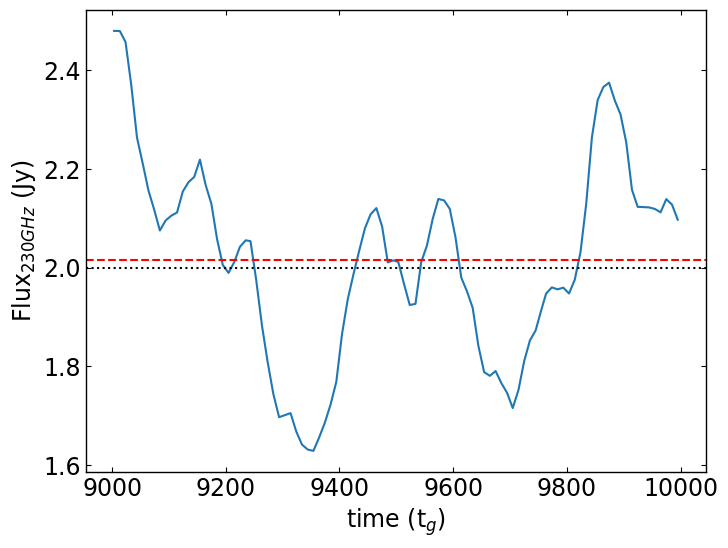

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [79]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

311:: 2.479796 Jy at 9003.597816
312:: 2.479513 Jy at 9013.664967
313:: 2.457255 Jy at 9023.730951
314:: 2.369916 Jy at 9033.794470
315:: 2.263598 Jy at 9043.862656
316:: 2.211202 Jy at 9053.929463
317:: 2.156414 Jy at 9063.995875
318:: 2.117728 Jy at 9074.060236
319:: 2.075261 Jy at 9084.125014
320:: 2.095531 Jy at 9094.191161
321:: 2.105307 Jy at 9104.258463
322:: 2.111771 Jy at 9114.324296
323:: 2.154143 Jy at 9124.388087
324:: 2.173218 Jy at 9134.450798
325:: 2.183830 Jy at 9144.515488
326:: 2.218868 Jy at 9154.580838
327:: 2.167356 Jy at 9164.643343
328:: 2.129382 Jy at 9174.708090
329:: 2.057467 Jy at 9184.774596
330:: 2.005119 Jy at 9194.841238
331:: 1.989426 Jy at 9204.906551
332:: 2.011496 Jy at 9214.968879
333:: 2.042422 Jy at 9225.032659
334:: 2.055420 Jy at 9235.096933
335:: 2.053613 Jy at 9243.486122
336:: 1.974963 Jy at 9253.551623
337:: 1.883184 Jy at 9263.615142
338:: 1.808771 Jy at 9273.678488
339:: 1.743795 Jy at 9283.741347
340:: 1.696946 Jy at 9293.805262
341:: 1.70

In [80]:
ind,time,z_tot,dscale = bhoss_avg(5, 1, 1, 70, 0, "MADS41A5")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh5/inc70/BHOSS_CODE
311, flux: 2.340339 at 9003.597816
312, flux: 2.373313 at 9013.664967
313, flux: 2.338819 at 9023.730951
314, flux: 2.252504 at 9033.794470
315, flux: 2.166090 at 9043.862656
316, flux: 2.125733 at 9053.929463
317, flux: 2.088844 at 9063.995875
318, flux: 2.075204 at 9074.060236
319, flux: 2.051019 at 9084.125014
320, flux: 2.104192 at 9094.191161
321, flux: 2.133792 at 9104.258463
322, flux: 2.152408 at 9114.324296
323, flux: 2.249858 at 9124.388087
324, flux: 2.302749 at 9134.450798
325, flux: 2.245618 at 9144.515488
326, flux: 2.249804 at 9154.580838
327, flux: 2.165848 at 9164.643343
328, flux: 2.158446 at 9174.708090
329, flux: 2.095514 at 9184.774596
330, flux: 2.051298 at 9194.841238
331, flux: 2.030285 at 9204.906551
332, flux: 2.000545 at 9214.968879
333, flux: 1.995314 at 9225.032659
334, flux: 2.013468 at 9235.096933
335, flux: 2.011946 at 9243.486122
336, flux: 1.922112 at 9253.551623
337, f

In [81]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh5/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [82]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh5/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 311/410/100
average z_tot = 2.016624 Jy, the density scale = 7.500000e-19


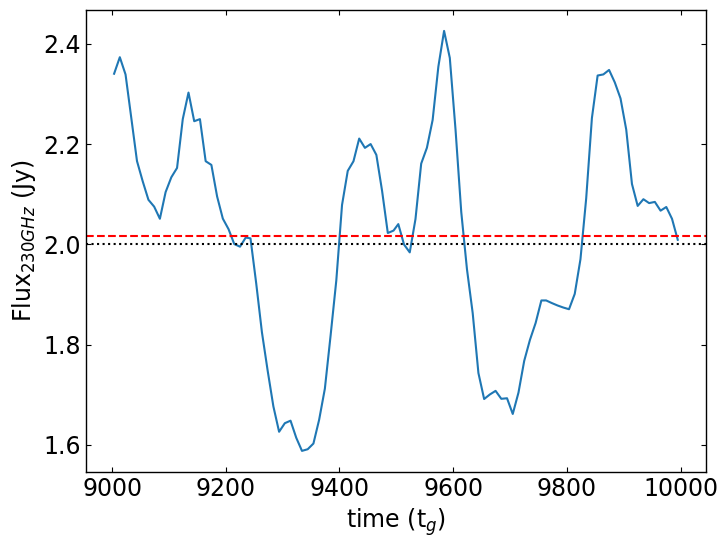

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [84]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

311:: 2.340339 Jy at 9003.597816
312:: 2.373313 Jy at 9013.664967
313:: 2.338819 Jy at 9023.730951
314:: 2.252504 Jy at 9033.794470
315:: 2.166090 Jy at 9043.862656
316:: 2.125733 Jy at 9053.929463
317:: 2.088844 Jy at 9063.995875
318:: 2.075204 Jy at 9074.060236
319:: 2.051019 Jy at 9084.125014
320:: 2.104192 Jy at 9094.191161
321:: 2.133792 Jy at 9104.258463
322:: 2.152408 Jy at 9114.324296
323:: 2.249858 Jy at 9124.388087
324:: 2.302749 Jy at 9134.450798
325:: 2.245618 Jy at 9144.515488
326:: 2.249804 Jy at 9154.580838
327:: 2.165848 Jy at 9164.643343
328:: 2.158446 Jy at 9174.708090
329:: 2.095514 Jy at 9184.774596
330:: 2.051298 Jy at 9194.841238
331:: 2.030285 Jy at 9204.906551
332:: 2.000545 Jy at 9214.968879
333:: 1.995314 Jy at 9225.032659
334:: 2.013468 Jy at 9235.096933
335:: 2.011946 Jy at 9243.486122
336:: 1.922112 Jy at 9253.551623
337:: 1.824572 Jy at 9263.615142
338:: 1.748107 Jy at 9273.678488
339:: 1.676765 Jy at 9283.741347
340:: 1.626085 Jy at 9293.805262
341:: 1.64

In [85]:
ind,time,z_tot,dscale = bhoss_avg(5, 1, 1, 90, 0, "MADS41A5")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh5/inc90/BHOSS_CODE
311, flux: 2.190222 at 9003.597816
312, flux: 2.214166 at 9013.664967
313, flux: 2.252849 at 9023.730951
314, flux: 2.262972 at 9033.794470
315, flux: 2.223413 at 9043.862656
316, flux: 2.156837 at 9053.929463
317, flux: 2.075747 at 9063.995875
318, flux: 2.077910 at 9074.060236
319, flux: 2.068849 at 9084.125014
320, flux: 2.145430 at 9094.191161
321, flux: 2.176403 at 9104.258463
322, flux: 2.151561 at 9114.324296
323, flux: 2.283035 at 9124.388087
324, flux: 2.291717 at 9134.450798
325, flux: 2.257681 at 9144.515488
326, flux: 2.285224 at 9154.580838
327, flux: 2.223696 at 9164.643343
328, flux: 2.259329 at 9174.708090
329, flux: 2.215478 at 9184.774596
330, flux: 2.059102 at 9194.841238
331, flux: 1.976566 at 9204.906551
332, flux: 1.958810 at 9214.968879
333, flux: 1.938122 at 9225.032659
334, flux: 1.996894 at 9235.096933
335, flux: 1.970393 at 9243.486122
336, flux: 1.900301 at 9253.551623
337, f

In [86]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh5/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [87]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh5/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 311/410/100
average z_tot = 2.030168 Jy, the density scale = 7.000000e-19


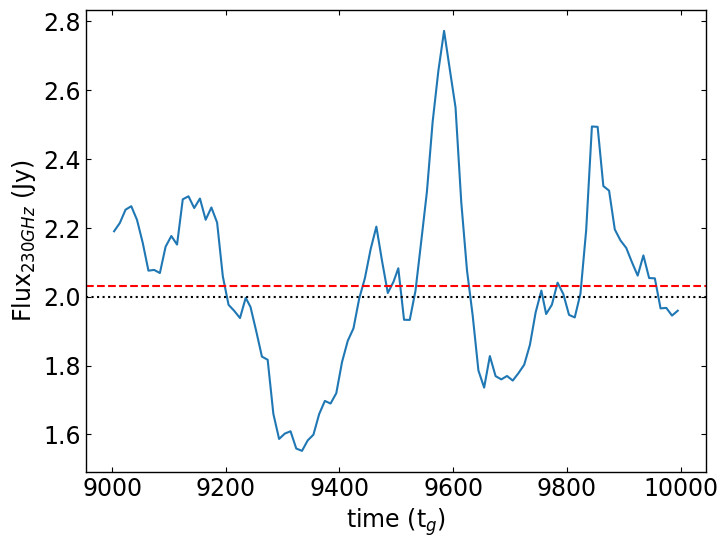

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [89]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

311:: 2.190222 Jy at 9003.597816
312:: 2.214166 Jy at 9013.664967
313:: 2.252849 Jy at 9023.730951
314:: 2.262972 Jy at 9033.794470
315:: 2.223413 Jy at 9043.862656
316:: 2.156837 Jy at 9053.929463
317:: 2.075747 Jy at 9063.995875
318:: 2.077910 Jy at 9074.060236
319:: 2.068849 Jy at 9084.125014
320:: 2.145430 Jy at 9094.191161
321:: 2.176403 Jy at 9104.258463
322:: 2.151561 Jy at 9114.324296
323:: 2.283035 Jy at 9124.388087
324:: 2.291717 Jy at 9134.450798
325:: 2.257681 Jy at 9144.515488
326:: 2.285224 Jy at 9154.580838
327:: 2.223696 Jy at 9164.643343
328:: 2.259329 Jy at 9174.708090
329:: 2.215478 Jy at 9184.774596
330:: 2.059102 Jy at 9194.841238
331:: 1.976566 Jy at 9204.906551
332:: 1.958810 Jy at 9214.968879
333:: 1.938122 Jy at 9225.032659
334:: 1.996894 Jy at 9235.096933
335:: 1.970393 Jy at 9243.486122
336:: 1.900301 Jy at 9253.551623
337:: 1.826013 Jy at 9263.615142
338:: 1.817031 Jy at 9273.678488
339:: 1.659643 Jy at 9283.741347
340:: 1.586930 Jy at 9293.805262
341:: 1.60